<h1> Image compression using Discrete Cosine Transform (DCT) </h1>

In this notebook, I will perform image compression using the common DCT technique. The function implementation is in the `impro_util.py` script.

Some linear algebra knowledge is assumed in this notebook, such as matrix diagonalization and basic matrix operations. Pre-requisite knowledge of series and summations is also assumed.

Note this only works for grayscale images.

In [8]:
# Import statements
import numpy as np
from scipy.fft import dctn, idctn
import matplotlib.pyplot as plt
import impro_utils as imp

plt.rcParams.update({'font.size': 40})

<h3> Loading image </h3>

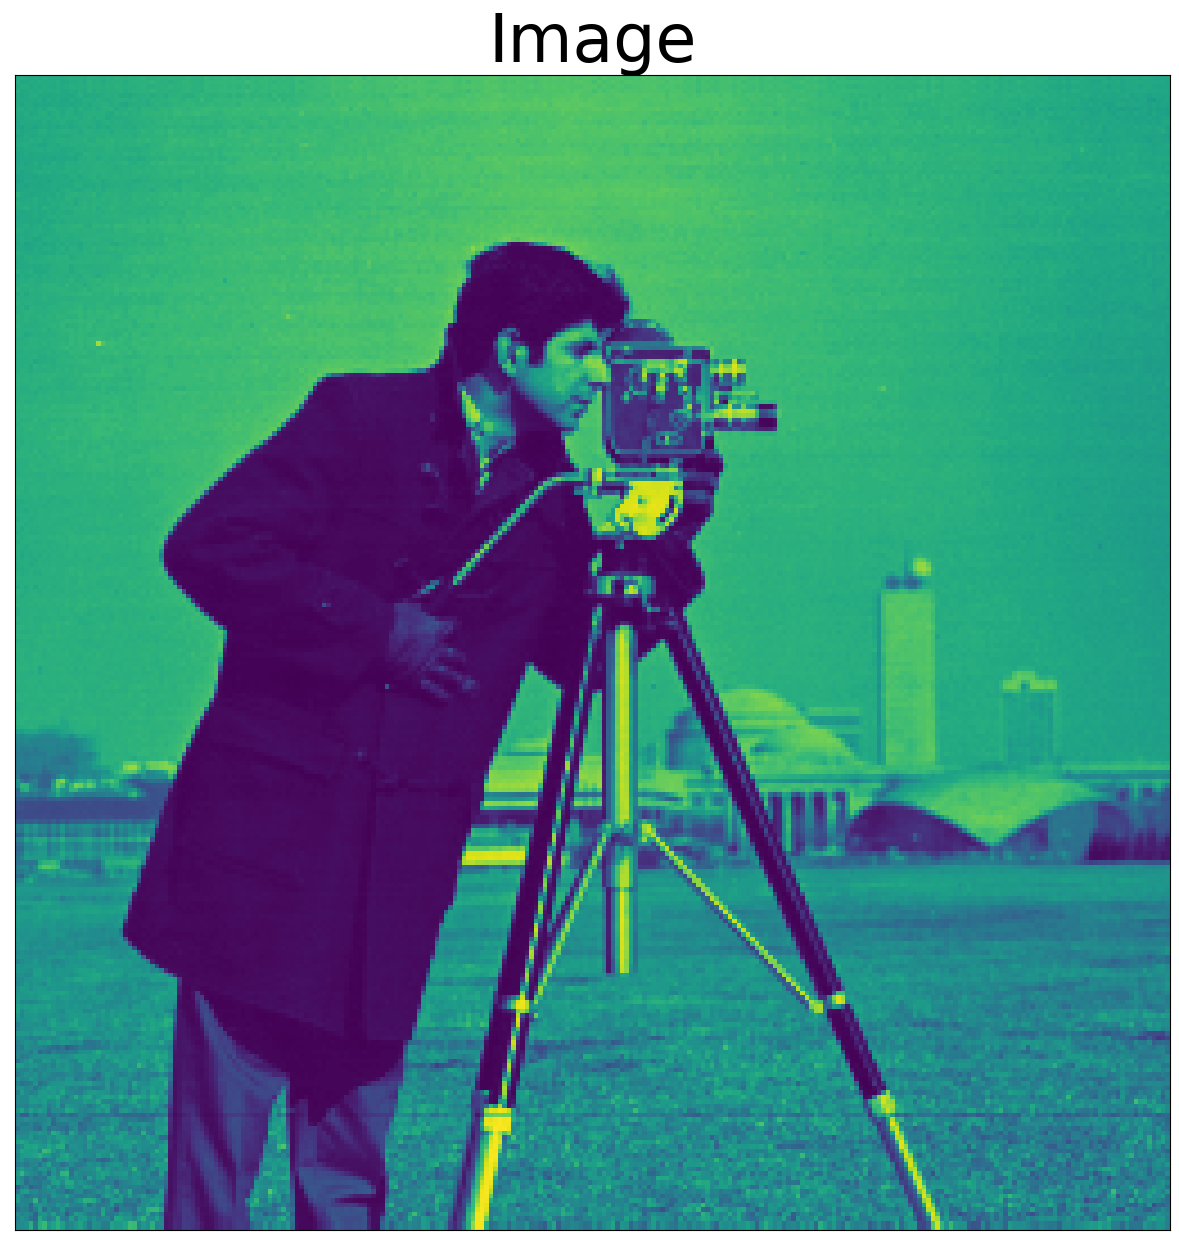

In [9]:
filename = 'images/test2.jpg'
image = imp.load_data(filename)

fig = plt.figure(figsize=(20,15))
imp.plot_img(image, "Image")

<h3> What is the Discrete Cosine Transform (DCT)? </h3>

Discrete Cosine Transform (DCT) is an operation by which an input is separated into individual components, notably a summation of basis functions consisting of cosines affixed with an intensity constant. Mathematically, the 2D DCT can be represented as:

$B_{pq}=\alpha_p\alpha_q\sum\limits^{M-1}_{m=0}\sum\limits^{N-1}_{n=0} A_{mn} \cos\left(\frac{\pi(2m+1)p}{2M}\right) \cos\left(\frac{\pi(2n+1)q}{2N}\right), \begin{cases}
      0\leq m \leq M-1\\
      0\leq n \leq N-1
    \end{cases}\\$

where:

$\alpha_p =  \begin{cases}
      1/\sqrt{M},\text{ } p=0\\
      \sqrt{2/M},\text{ } 1\leq p \leq M-1
    \end{cases}\\$
    
and

$\alpha_q = \begin{cases}
      1/\sqrt{N},\text{ } q=0\\
      \sqrt{2/N},\text{ } 1\leq q \leq N-1
    \end{cases}\\$

To recover the image, the inverse of the DCT is used.

$A_{mn}=\sum\limits^{M-1}_{p=0}\sum\limits^{N-1}_{q=0}\alpha_p\alpha_q B_{pq} \cos\left(\frac{\pi(2m+1)p}{2M}\right) \cos\left(\frac{\pi(2n+1)q}{2N}\right), \begin{cases}
      0\leq m \leq M-1\\
      0\leq n \leq N-1
    \end{cases}\\$

Applying the DCT to the image will return a 2D matrix containing the coefficients of the cosine series. A coefficient with higher intensity (value) equates to a cosine term having higher importance in the reconstruction. Any coefficients close or equal to zero are deemed unimportant and can be ignored in the image reconstruction.

Below, a DCT is applied to the photographer image and shown are the coefficients post-transformation. The top left quadrant has higher importance due to its higher intensity (shown on the colorbar), therefore only the top left quadrant is needed in the reconstruction. 

Given an initial image size of 256x256, we will take the 50x50 grid from the top left to start. The Python implementation of the DCT is used for speed, but a "homemade" version would involve two for loops to individually calculate each coefficient of the image DCT.

(256, 256)


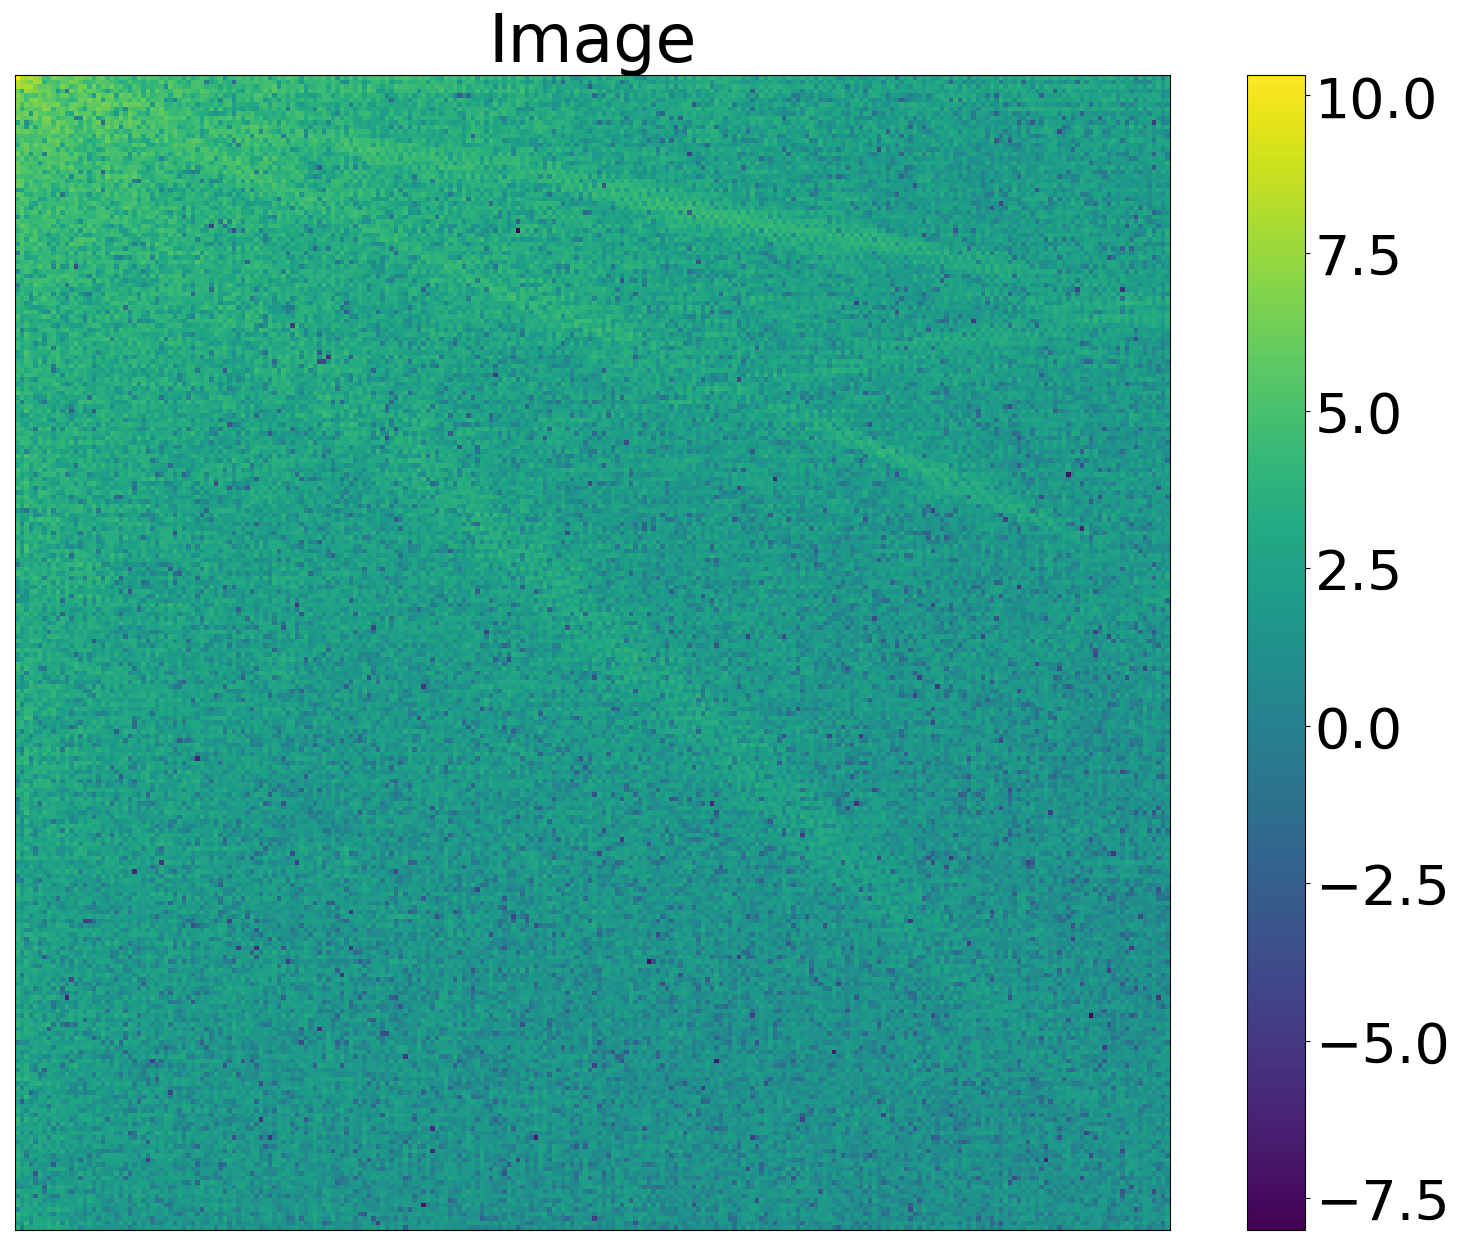

In [10]:
dct_coeffs = dctn(image, norm='ortho')

print(np.shape(image))

fig = plt.figure(figsize=(20,15))
imp.plot_img(np.log(abs(dct_coeffs)), "Image")
plt.colorbar()

<h3> Displaying results </h3>

Shown on the right is the compressed version of the image on the left. Note the image artifacts! A 50x50 grid of the original 256x256 DCT coefficients were used in the compressed image (decrease of 94%). Although the result has similar shape to the original image, it is far too pixelated to be of value. In this way, DCT is known as a "lossy" form of compression leading to degradation of the image in its compressed representation due to inexact approximations.

Taking a 100x100 grid instead gives a better result, which still represents a decrease of 85% of the original number of coefficients.

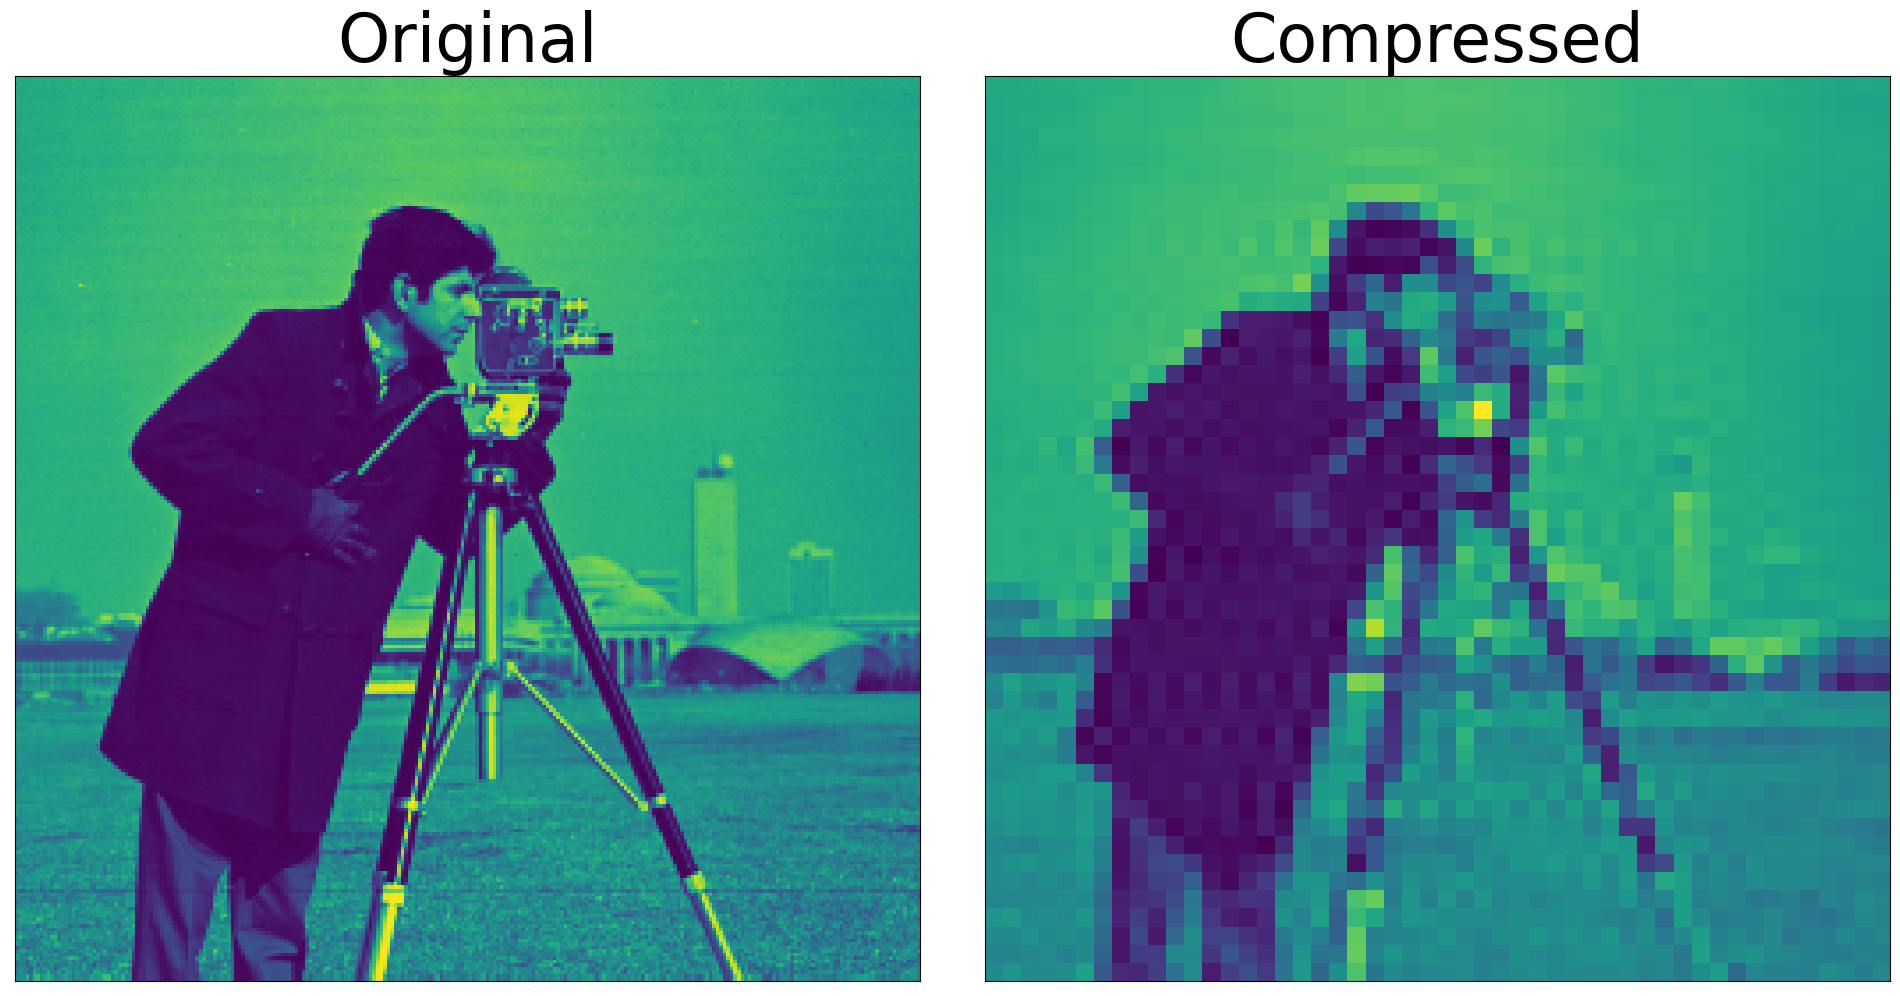

In [11]:
inv_dct = idctn(dct_coeffs[0:50,0:50], norm='ortho')

fig = plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
imp.plot_img(abs(image),'Original')
plt.subplot(1,2,2)
imp.plot_img(abs(inv_dct),'Compressed')
plt.tight_layout()

<h3> Different levels of compression... </h3>

Experimenting with different numbers of grid sizes shows just how powerful this technique is for compression.

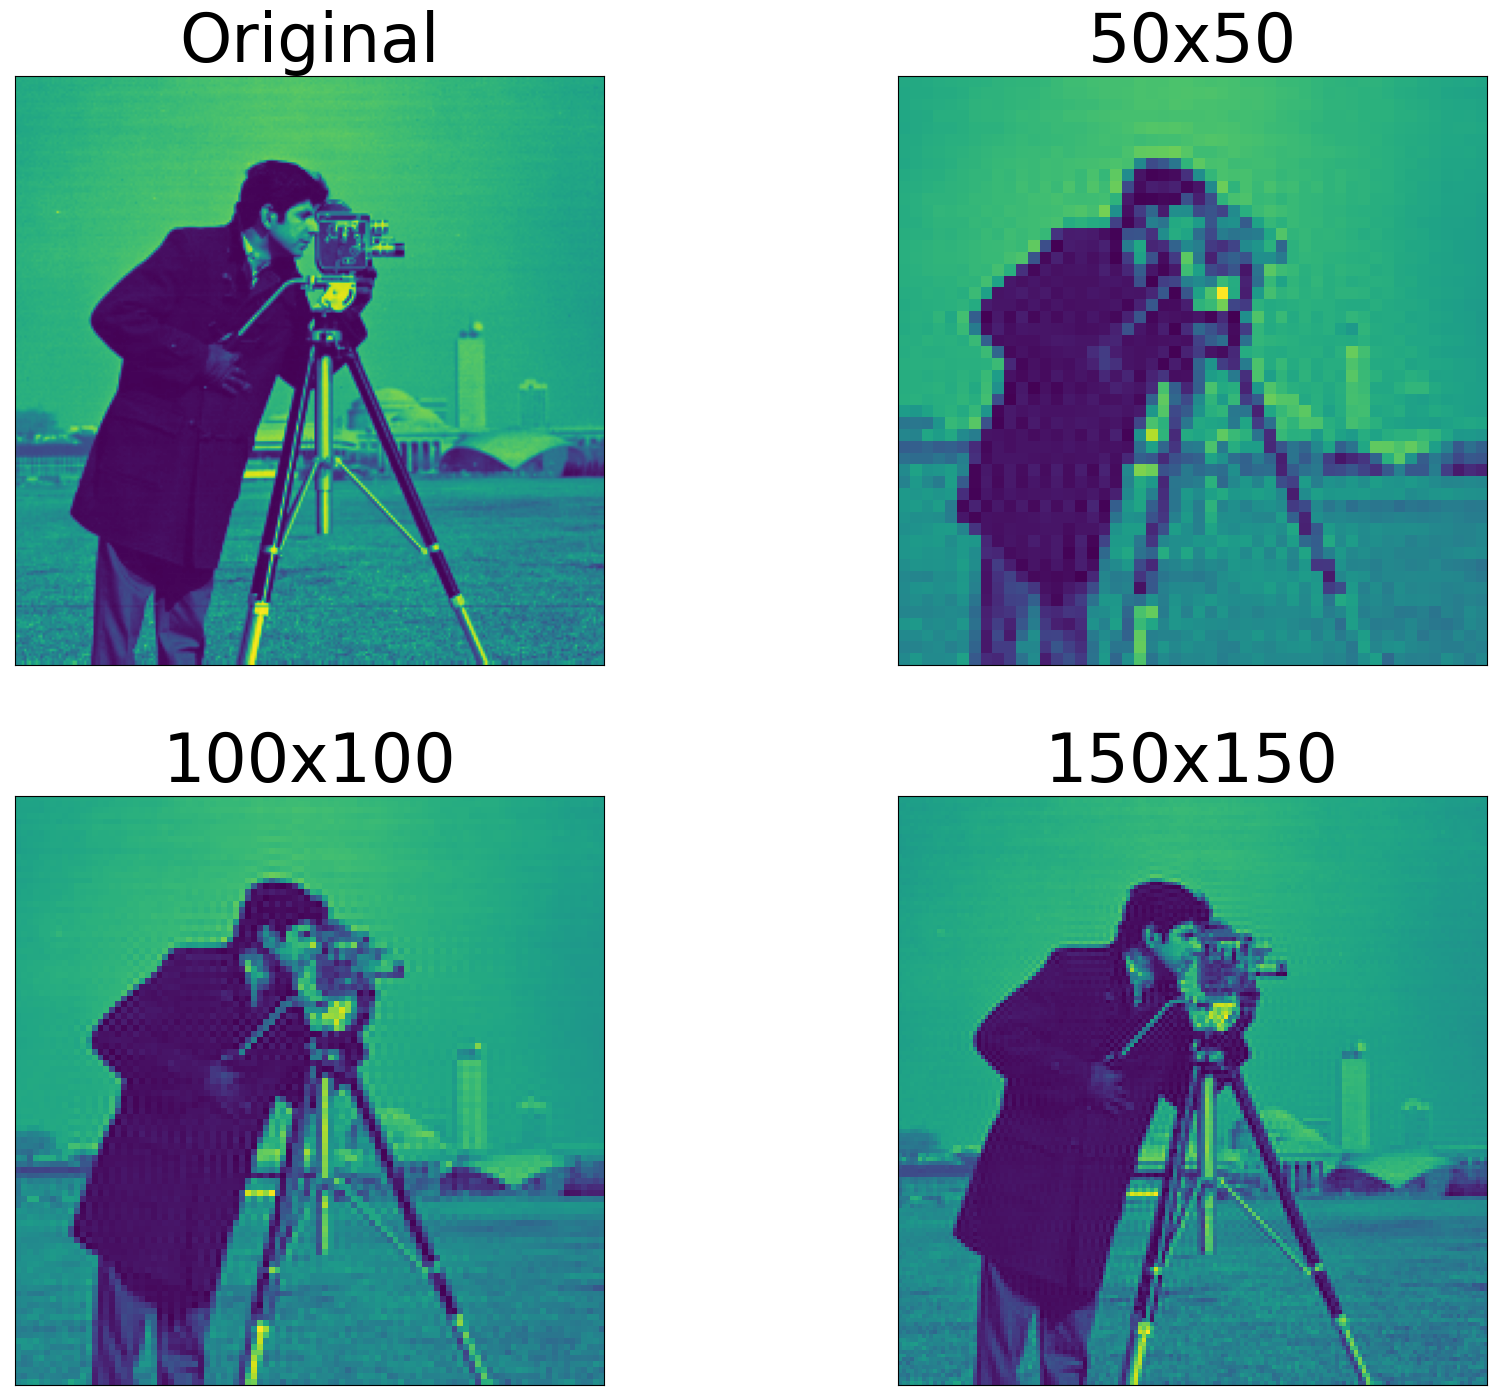

In [12]:
num_1 = 50

num_2 = 100

num_3 = 150

inv_dct_1 = idctn(dct_coeffs[0:num_1,0:num_1], norm='ortho')

inv_dct_2 = idctn(dct_coeffs[0:num_2,0:num_2], norm='ortho')

inv_dct_3 = idctn(dct_coeffs[0:num_3,0:num_3], norm='ortho')

fig = plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
imp.plot_img(abs(image),'Original')
plt.subplot(2,2,2)
imp.plot_img(abs(inv_dct_1),'50x50')
plt.subplot(2,2,3)
imp.plot_img(abs(inv_dct_2),'100x100')
plt.subplot(2,2,4)
imp.plot_img(abs(inv_dct_3),'150x150')
plt.tight_layout()